In [119]:
from pucknight import pn_queries
import pandas as pd
from hockey_rink import NHLRink
import datetime
import matplotlib.pyplot as plt

In [6]:
games_df = pn_queries.api_games()
gd = datetime.date(2022, 2, 3)

In [12]:
games_df[games_df.game_date >= gd]\
.sort_values(['game_status','period'],ascending=[False,False])\
[['game_id','home_team','home_score','away_team','away_score', 'game_status','period','time_remaining','venue']]

,game_id,home_team,home_score,away_team,away_score,game_status,period,time_remaining,venue
707,2021020807,Red Wings,2,Kings,3,In Progress - Critical,3,0 days 02:37:00,Little Caesars Arena
705,2021020809,Blackhawks,0,Wild,0,In Progress,1,0 days 07:47:00,United Center
708,2021020810,Coyotes,1,Flames,1,In Progress,1,0 days 10:30:00,Gila River Arena
704,2021020808,Capitals,3,Oilers,5,Final,3,0 days 00:00:00,Capital One Arena
706,2021020777,Islanders,0,Kraken,3,Final,3,0 days 00:00:00,UBS Arena


In [20]:
game_id = 2021020807

In [55]:
home = games_df[games_df['game_id']==game_id].home_team.iloc[0]
away = games_df[games_df['game_id']==game_id].away_team.iloc[0]
lineups = pn_queries.api_lineups(game_id)
sl = pn_queries.api_s_lines(game_id)
gl = pn_queries.api_g_lines(game_id)
events = pn_queries.game_events(game_id)    
sl['pts'] = sl.goals + sl.assists

In [47]:
away+': '+ str(games_df[games_df['game_id']==game_id].iloc[0].away_score) + ' @ '\
+ home +': '+ str(games_df[games_df['game_id']==game_id].iloc[0].home_score)

'Kings: 3 @ Red Wings: 2'

In [46]:
"Period: " + str(games_df[games_df['game_id']==game_id].iloc[0].period)+\
' - ' + str(games_df[games_df['game_id']==game_id].iloc[0].time_remaining) + " Remaining"

'Period: 3 - 0 days 02:37:00 Remaining'

In [49]:
home

'Red Wings'

In [59]:
sl[sl['team_name']==home].sort_values(['pts','shots','toi'], ascending=[False,False,False])\
[['team_name','playername','jersey_num','pos_abbv','toi','goals','assists','shots']]

,team_name,playername,jersey_num,pos_abbv,toi,goals,assists,shots
27,Red Wings,Tyler Bertuzzi,59,LW,0 days 00:21:47,1,0,3
24,Red Wings,Michael Rasmussen,27,C,0 days 00:12:29,1,0,2
18,Red Wings,Filip Zadina,11,RW,0 days 00:10:55,0,1,2
20,Red Wings,Filip Hronek,17,D,0 days 00:19:16,0,1,1
25,Red Wings,Gustav Lindstrom,28,D,0 days 00:16:32,0,1,1
30,Red Wings,Dylan Larkin,71,C,0 days 00:18:53,0,1,0
22,Red Wings,Lucas Raymond,23,LW,0 days 00:17:41,0,0,4
21,Red Wings,Marc Staal,18,D,0 days 00:18:00,0,0,3
31,Red Wings,Adam Erne,73,LW,0 days 00:13:42,0,0,2
26,Red Wings,Moritz Seider,53,D,0 days 00:20:52,0,0,1


In [60]:
sl[sl['team_name']==away].sort_values(['pts','shots','toi'], ascending=[False,False,False])\
[['team_name','playername','jersey_num','pos_abbv','toi','goals','assists','shots']]

,team_name,playername,jersey_num,pos_abbv,toi,goals,assists,shots
5,Kings,Trevor Moore,12,C,0 days 00:16:50,0,2,5
9,Kings,Phillip Danault,24,C,0 days 00:16:46,2,0,5
17,Kings,Austin Strand,71,D,0 days 00:16:45,0,2,4
10,Kings,Viktor Arvidsson,33,LW,0 days 00:17:23,0,1,6
11,Kings,Arthur Kaliyev,34,RW,0 days 00:09:29,1,0,4
12,Kings,Blake Lizotte,46,C,0 days 00:10:36,0,1,0
4,Kings,Anze Kopitar,11,C,0 days 00:18:12,0,0,5
2,Kings,Drew Doughty,8,D,0 days 00:23:57,0,0,4
7,Kings,Andreas Athanasiou,22,C,0 days 00:14:44,0,0,2
13,Kings,Brendan Lemieux,48,LW,0 days 00:08:44,0,0,2


In [68]:
gl[gl['toi']>'00:00:00']\
[['team_name', 'playername','jersey_num','pos_abbv','toi','shots','saves']]

,team_name,playername,jersey_num,pos_abbv,toi,shots,saves
0,Kings,Jonathan Quick,32,G,0 days 00:56:09,23,21
3,Red Wings,Alex Nedeljkovic,39,G,0 days 00:56:00,42,39


In [73]:
home_events = events[events.team_name == home]
away_events = events[events.team_name == away]
        
h_shots = home_events[(home_events.event=='SHOT')\
                          &(home_events.action=='Shooter')]
h_goals = home_events[(home_events.event=='GOAL')\
                          &(home_events.action=='Scorer')] 
    
a_shots = away_events[(away_events.event=='SHOT')\
                          &(away_events.action=='Shooter')]
a_goals = away_events[(away_events.event=='GOAL')\
                          &(away_events.action=='Scorer')] 
    
h_missed_shots = home_events[home_events.event.isin(['BLOCKED SHOT','MISSED SHOT'])\
                          &(home_events.action=='Shooter')]    
a_missed_shots = away_events[away_events.event.isin(['BLOCKED SHOT','MISSED SHOT'])\
                          &(away_events.action=='Shooter')]   
h1_shots = h_shots[h_shots['period']=='1']
h2_shots = h_shots[h_shots['period']=='2']
h3_shots = h_shots[h_shots['period']=='3']
h4_shots = h_shots[h_shots['period']=='4']

a1_shots = a_shots[a_shots['period']=='1']
a2_shots = a_shots[a_shots['period']=='2']
a3_shots = a_shots[a_shots['period']=='3']
a4_shots = a_shots[a_shots['period']=='4']

h1_goals = h_goals[h_goals['period']=='1']
h2_goals = h_goals[h_goals['period']=='2']
h3_goals = h_goals[h_goals['period']=='3']
h4_goals = h_goals[h_goals['period']=='4']

a1_goals = a_goals[a_goals['period']=='1']
a2_goals = a_goals[a_goals['period']=='2']
a3_goals = a_goals[a_goals['period']=='3']
a4_goals = a_goals[a_goals['period']=='4']   

In [138]:
#rink = NHLRink(rotation=45, boards={'length':150,'width':150,'radius':75})
rink = NHLRink()
h_col = 'k'
a_col = 'r'

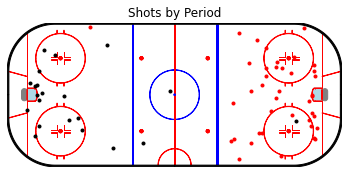

In [189]:
ax = rink.draw()
ax.set_title('Shots by Period')
rink.scatter(a1_shots['x_coord'], a1_shots['y_coord'], label = 'Away Shots', c = a_col ,marker = '.')
rink.scatter(-1 * a2_shots['x_coord'], -1 * a2_shots['y_coord'],label = 'Away Shots', c = a_col ,marker = '.')
rink.scatter(a3_shots['x_coord'], a3_shots['y_coord'], label = 'Away Shots', c = a_col ,marker = '.')
rink.scatter(-1 * a4_shots['x_coord'], -1 * a4_shots['y_coord'], label = 'Away Shots', c = a_col ,marker = '.')
#rink.scatter(a_missed_shots.x_coord, a_missed_shots.y_coord, label = 'AwayShots Missed', c='k', marker = 'x')

rink.scatter(h1_shots['x_coord'], h1_shots['y_coord'], label = 'Home Shots', c = h_col ,marker = '.')
rink.scatter(-1 * h2_shots['x_coord'], -1 * h2_shots['y_coord'], label = 'Home Shots', c = h_col ,marker = '.')
rink.scatter(h3_shots['x_coord'], h3_shots['y_coord'], label = 'Home Shots', c = h_col ,marker = '.')
rink.scatter(-1 * h4_shots['x_coord'], -1 * h4_shots['y_coord'], label = 'Home Shots', c = h_col ,marker = '.')


,period,per_time_rem,team_name,event,action,event_type,playername,jersey_num,pos_code,away_score,home_score,x_coord,y_coord
